In [97]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import Markdown,display
import datetime
import time
import re
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn import preprocessing
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score




asset_directory = "data/data_asset_choosed/487_None"
file_name = "data/data_asset_choosed/487_1000/487_2.csv"
df_asset = pd.read_csv(file_name,parse_dates=[1])
df_asset.head(10)
print(len(df_asset[~np.isnan(df_asset['fuel'])]))

256


In [56]:
df_asset.corr('pearson')

,asset,MDI_OBD_SPEED,GPS_SPEED,MDI_OBD_RPM,MDI_OBD_ENGINE_LOAD,MDI_OBD_FUEL,ODO_FULL_METER,MDI_DASHBOARD_MILEAGE,distance_meter,speed_filled,meter_filled,avrg_speed,distance_speed,distance_cum,delay,fuel
asset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDI_OBD_SPEED,NaN,1.000000,0.998063,0.941116,0.718044,-0.233220,-0.465359,NaN,-0.074486,1.000000,-0.278429,-0.003131,-0.226740,-0.263174,-0.842397,-0.379786
GPS_SPEED,NaN,0.998063,1.000000,0.944871,0.438121,-0.155745,-0.376751,NaN,-0.037953,0.998043,-0.245297,0.036853,-0.148794,-0.229880,-0.843054,-0.338213
MDI_OBD_RPM,NaN,0.941116,0.944871,1.000000,0.583875,-0.343488,-0.486876,NaN,0.145951,0.942105,-0.384548,-0.095073,-0.020755,-0.366036,-0.756536,-0.242418
MDI_OBD_ENGINE_LOAD,NaN,0.718044,0.438121,0.583875,1.000000,-0.338716,-0.362081,NaN,0.064910,0.498484,-0.414904,-0.343327,0.095388,-0.411807,-0.390535,-0.113707
MDI_OBD_FUEL,NaN,-0.233220,-0.155745,-0.343488,-0.338716,1.000000,0.998476,NaN,0.171342,-0.171661,0.998380,0.318093,0.166481,0.998231,0.363745,0.220224
ODO_FULL_METER,NaN,-0.465359,-0.376751,-0.486876,-0.362081,0.998476,1.000000,NaN,0.142490,-0.410377,1.000000,0.298457,0.175798,0.999813,0.490899,0.349782
MDI_DASHBOARD_MILEAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_meter,NaN,-0.074486,-0.037953,0.145951,0.064910,0.171342,0.142490,NaN,1.000000,-0.046306,0.142490,0.078997,0.737474,0.140679,0.312257,0.757968
speed_filled,NaN,1.000000,0.998043,0.942105,0.498484,-0.171661,-0.410377,NaN,-0.046306,1.000000,-0.556472,0.119959,0.198940,-0.537298,-0.834195,-0.337714


In [94]:
#Statsmodel
#With min max scaling
min_max_scaler = preprocessing.StandardScaler()
df= df_asset[~np.isnan(df_asset['MDI_OBD_FUEL'])]
df = df[np.isfinite(df['meter_filled'])]
time = df['recorded_at']
X = pd.DataFrame(min_max_scaler.fit_transform(df[['speed_filled','meter_filled','distance_cum','avrg_speed']]),index=df.index)

y = pd.DataFrame(min_max_scaler.fit_transform(df['MDI_OBD_FUEL'].reshape(-1,1)),index=df.index)
# Fit model and print summary
rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT(),missing='drop')
ols_model = sm.OLS(y,X)

ols_results = ols_model.fit()
rlm_results = rlm_model.fit()

print(rlm_results.summary())
print(ols_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      0   No. Observations:                  257
Model:                            RLM   Df Residuals:                      253
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 04 Mar 2018                                         
Time:                        21:01:50                                         
No. Iterations:                    32                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0150      0.005     -2.938      0.0

/homes/wsahel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


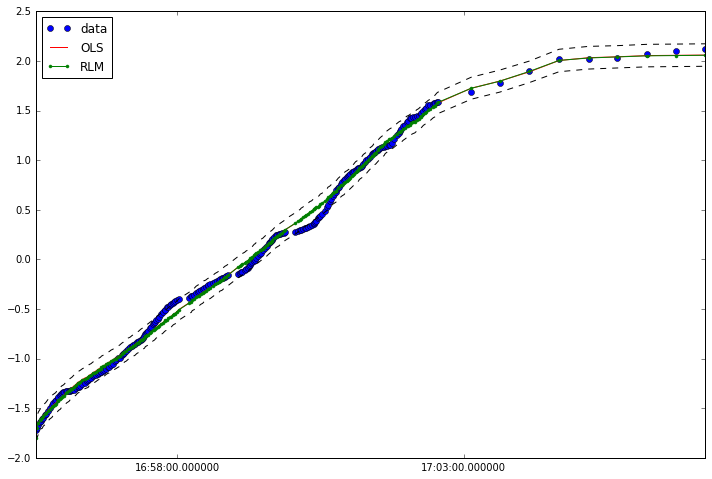

In [95]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(time,y, 'o',label="data")
prstd, iv_l, iv_u = wls_prediction_std(ols_results)
ax.plot(time, ols_results.fittedvalues, 'r-', label="OLS")
ax.plot(time, iv_u, 'k--')
ax.plot(time, iv_l, 'k--')
ax.plot(time, rlm_results.fittedvalues, 'g.-', label="RLM")
ax.legend(loc="best")





In [100]:
#With log transformation
df= df_asset[~np.isnan(df_asset['MDI_OBD_FUEL'])]
df = df[np.isfinite(df['meter_filled'])]
time = df['recorded_at']
X = pd.DataFrame(np.log1p(df[['speed_filled','meter_filled','distance_cum','avrg_speed']]),index=df.index)

y = pd.DataFrame(np.log1p(df['MDI_OBD_FUEL'].reshape(-1,1)),index=df.index)
# Fit model and print summary
rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT(),missing='drop')
ols_model = sm.OLS(y,X)

ols_results = ols_model.fit()
rlm_results = rlm_model.fit()

print(rlm_results.summary())
print(ols_results.summary())



                    Robust linear Model Regression Results                    
Dep. Variable:                      0   No. Observations:                  257
Model:                            RLM   Df Residuals:                      253
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 04 Mar 2018                                         
Time:                        21:12:45                                         
No. Iterations:                    50                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
speed_filled     0.0002   1.37e-05     12.043   

/homes/wsahel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


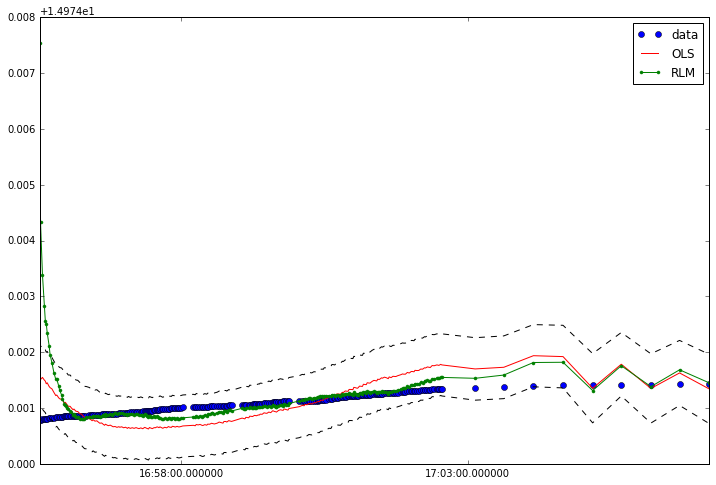

In [101]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(time,y, 'o',label="data")
prstd, iv_l, iv_u = wls_prediction_std(ols_results)
ax.plot(time, ols_results.fittedvalues, 'r-', label="OLS")
ax.plot(time, iv_u, 'k--')
ax.plot(time, iv_l, 'k--')
ax.plot(time, rlm_results.fittedvalues, 'g.-', label="RLM")
ax.legend(loc="best")




/homes/wsahel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


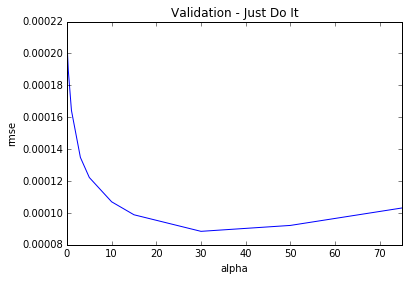

In [104]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

df= df_asset[~np.isnan(df_asset['MDI_OBD_FUEL'])]
df = df[np.isfinite(df['meter_filled'])]
time = df['recorded_at']
X = pd.DataFrame(np.log1p(df[['speed_filled','meter_filled','distance_cum','avrg_speed']]),index=df.index)

y = pd.DataFrame(np.log1p(df['MDI_OBD_FUEL'].reshape(-1,1)),index=df.index)

model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [105]:
#Best alpha is 30 and it gives:
cv_ridge.min()

8.844044155421215e-05

In [106]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X, y)
rmse_cv(model_lasso).mean()

/homes/wsahel/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/homes/wsahel/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/homes/wsahel/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/homes/wsahel/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y 

0.00017992356359240242

In [109]:
#Let it choose features
coef = pd.Series(model_lasso.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

#Importance of features:



imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])


matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")



Lasso picked 0 variables and eliminated the other 4 variables


NameError: name 'imp_coef' is not defined